# Building Hotel Search Engine using Python

by Indri Dayanah Ayulani

# ETL 

The first thing to do is to import the relevant modules and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, load the file into Pandas dataframe

In [2]:
hotel_df = pd.read_excel(r'C:\Users\ASUS\Documents\data_hotel.xlsx') 
review_df = pd.read_excel(r'C:\Users\ASUS\Documents\review_hotel.xlsx') 

Display the top 5 data in the hotel table (hotel_df)

In [3]:
hotel_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


Checking data type of each column in the hotel table (hotel_df)

In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
hotel_id             1199 non-null object
hotel_name           1199 non-null object
hotel_description    1098 non-null object
hotel_province       1199 non-null object
hotel_city           1199 non-null object
hotel_address        1199 non-null object
price_per_night      1193 non-null float64
dtypes: float64(1), object(6)
memory usage: 65.6+ KB


Checking NULL value data in each column in the hotel table (hotel_df)

In [5]:
hotel_df.isnull().sum()

hotel_id               0
hotel_name             0
hotel_description    101
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        6
dtype: int64

Known that 'hotel_description' and ''price per night' column have a data with NULL value.

In [6]:
hotel_df.loc[hotel_df['hotel_description'].isnull()|hotel_df['price_per_night'].isnull()]

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,5.278667e+05
26,h0027,ibis budget Surabaya Diponegoro,NaN,Jawa Timur,Surabaya,Jalan Raya Diponegoro no 183,2.062320e+05
41,h0042,Citra Suites Surabaya,NaN,Jawa Timur,Surabaya,Jalan Bratang Binangun 53 A,2.375000e+05
47,h0048,Novotel Surabaya Hotel & Suite,NaN,Jawa Timur,Surabaya,Jalan Ngagel No. 173 - 175,5.455220e+05
48,h0049,Novotel Samator Surabaya Timur,NaN,Jawa Timur,Surabaya,Jl Kedung Baruk 28 Rungkut,6.160385e+05
49,h0050,ibis Budget Surabaya Airport,NaN,Jawa Timur,Surabaya,Terminal Bandara International,4.812500e+05
50,h0051,Medokan House Syariah Surabaya,NaN,Jawa Timur,Surabaya,"Jl. Raya Medokan Sawah No.28, Medokan Ayu, Run...",1.367210e+05
51,h0052,OYO 1330 Hotel Cahaya 3,NaN,Jawa Timur,Surabaya,"Jl. Raya By pass Juanda No.3, Sidoarjo 61253",2.252685e+05
52,h0053,OYO Flagship 1575 Urban 18,NaN,Jawa Timur,Surabaya,"Jl. Raya Kendangsari Industri No.41, Kendangsa...",1.363130e+05
53,h0054,OYO Flagship 910 Menara Rungkut Surabaya,NaN,Jawa Timur,Surabaya,"Jl. Kyai Abdul Karim No.37-39, Rungkut Menangg...",1.339090e+05


Remove data with NULL value and count the amount of data  after that NULL Value data is removed

In [7]:
hotel_df = hotel_df.loc[(hotel_df['hotel_description'].notnull())]

print(len(hotel_df))

1098


In [8]:
hotel_df

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000
5,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276333.333333
6,h0007,Evora Hotel Surabaya,Ketika bisnis dan kenyamanan sinergi di satu t...,Jawa Timur,Surabaya,"Jl. Menur 18 - 20, Surabaya, Indonesia",283000.000000
7,h0008,MaxOneHotels at Dharmahusada,Pengalaman kenyamanan maksimum dalam kesederha...,Jawa Timur,Surabaya,"Jl. Dharmahusada No. 189, Gubeng, Surabaya, Ja...",463328.500000
8,h0009,Zoom Dharmahusada Hotel,"Akomodasi modern, nyaman, dan tenang di Surabaya",Jawa Timur,Surabaya,"Jl. Raya Dharmahusada No. 188, Surabaya, Indon...",309540.000000
9,h0010,Neo+ Waru Sidoarjo by ASTON,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Timur,Surabaya,"Jl. S. Parman No. 52-54, Waru, Sidoarjo, Surab...",293122.500000
10,h0011,favehotel Sidoarjo,Penginapan Yang Tenang Dan Nyaman di Sidoarjo.,Jawa Timur,Surabaya,"Jl. Jenggolo No. 15, Pucang, Kec. Sidoarjo, Ka...",447216.000000


Now display the top 5 data from review table (review_df)

In [9]:
review_df.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good


Checking data type of each column in the review table (review_df)

In [10]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 9 columns):
booking_id       4306 non-null object
booking_date     4306 non-null object
hotel_id         3833 non-null object
hotel_name       4306 non-null object
stay_duration    4306 non-null int64
adults           4306 non-null int64
children         4306 non-null int64
rating           4306 non-null float64
review           4306 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 302.8+ KB


Known that 'hotel_id' column have a data with NULL value.
Then, display data with NULL value in hotel_id columns

In [11]:
review_df.loc[review_df['hotel_id'].isnull()]

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
30,b0031,28-05-2020,NaN,Grand Dafam Signature Surabaya,1,1,0,10.0,Semuanya membuat nyaman
31,b0032,27-05-2020,NaN,Grand Dafam Signature Surabaya,2,2,0,8.4,Hotel strategis di pusat kota
32,b0033,09-04-2020,NaN,Grand Dafam Signature Surabaya,1,2,0,10.0,Hotel yang sangat bagus
33,b0034,26-03-2020,NaN,Grand Dafam Signature Surabaya,2,2,1,9.2,2 malam yg menyenangkan
34,b0035,08-03-2020,NaN,Grand Dafam Signature Surabaya,2,2,0,10.0,Hotel yang menyenangkan
35,b0036,27-01-2020,NaN,Grand Dafam Signature Surabaya,2,1,0,9.6,Hotel baru ditengah kota
36,b0037,03-01-2020,NaN,Grand Dafam Signature Surabaya,2,1,0,9.6,Hotel yang menyenangkan
37,b0038,29-12-2019,NaN,Grand Dafam Signature Surabaya,2,2,0,9.6,Pelayanan yang responsif
38,b0039,25-12-2019,NaN,Grand Dafam Signature Surabaya,2,1,0,10.0,Sempurna
39,b0040,11-12-2019,NaN,Grand Dafam Signature Surabaya,1,2,0,8.0,Hotel baru yang bersih


Remove the data with NULL value and count the amount of data after that NULL Value data is removed

In [12]:
review_df = review_df.loc[(review_df['hotel_id'].notnull())]

print(len(review_df))

3833


In [13]:
review_df

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good
5,b0006,09-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,10.0,Hotel yg nyaman
6,b0007,08-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,7.6,Liburan
7,b0008,06-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,7.2,Nyaman dan murah
8,b0009,05-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,8.4,Hotel yg menyenangkan
9,b0010,01-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,7.2,Nyaman


# Inner Join Table between hotel table and rating table

First, create rating table to count overall averege rating and the number of review for each hotel

In [14]:
rating_df = review_df.groupby('hotel_name').agg({'booking_id':'size','rating':'mean'}).rename(columns={'booking_id':'num_review','rating':'avg_rating'}).reset_index()

rating_df.sort_values(by='num_review',ascending = False)

,hotel_name,num_review,avg_rating
163,Hotel Cemerlang,20,8.28
209,InterContinental Bandung Dago Pakar,20,9.52
365,Valore Hotel,20,7.48
359,U Janevalla Bandung,20,8.28
367,Verona Palace Hotel,20,8.32
168,Hotel Dafam Rio,20,9.08
118,Grand Pacific Hotel,20,8.32
370,Vio Hotel Cimanuk,20,8.36
371,Vio Hotel Pasteur,20,8.68
372,Vio Hotel Surapati,20,8.92


Create a join table between hotel_df and rating_df to get a number of review for each hotel, then display the top 5 data and data types from each column.

In [15]:
hotel_rating_df = pd.merge(hotel_df,rating_df,on = ['hotel_name'],how = 'inner')

hotel_rating_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating
0,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,10,8.32
1,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,10,8.76
2,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,10,8.52
3,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,10,8.04
4,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276333.333333,10,7.52


In [16]:
hotel_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 9 columns):
hotel_id             404 non-null object
hotel_name           404 non-null object
hotel_description    404 non-null object
hotel_province       404 non-null object
hotel_city           404 non-null object
hotel_address        404 non-null object
price_per_night      404 non-null float64
num_review           404 non-null int64
avg_rating           404 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.6+ KB


# Building Simple Recommender System

This project will use simple recommender system, then use weighted rating formula as a metric/score. Mathematically, it is represented as follows:

## WeightedRating(WR)=(v/(v+m))⋅R+(m/(v+m))⋅C

v is the number of review for the hotel;

m is the minimum number of review;

R is the average rating of the each hotel;

C is the average rating for all hotel.

In [17]:
C = hotel_rating_df['avg_rating'].mean()
print(C)

8.36863547068992


In [18]:
m = hotel_rating_df['num_review'].quantile(0.8)
print(m)

10.0


In [19]:
def hotel_rating(df, var=0.8):
    v = df['num_review']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['num_review'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C
    return df['score']
    
hotel_rating(hotel_rating_df)

hotel_rating_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating,score
0,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,10,8.32,8.344318
1,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,10,8.76,8.564318
2,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,10,8.52,8.444318
3,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,10,8.04,8.204318
4,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276333.333333,10,7.52,7.944318


In [20]:
def simple_recommender(df, top=100):
    df = df.loc[df['num_review'] >= m]
    df = df.sort_values(by='score', ascending=False)
    
    df = df[:top]
    return df
         
simple_recommender(hotel_rating_df, top=25)

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating,score
377,h0764,InterContinental Bandung Dago Pakar,Alamat\n Jalan Resor Dago Pakar Raya 2B\n \n \...,Jawa Barat,Bandung,Jalan Resor Dago Pakar Raya 2B,1.646185e+06,20,9.52,9.136212
362,h0721,Hotel Marcopolo,"Hotel Bintang 3 di Menteng, Jakarta.\n \n Hote...",DKI Jakarta,Jakarta,"Jl. Teuku Cik Ditiro No.19, Menteng, Jakarta, ...",5.030000e+05,10,9.84,9.104318
143,h0495,favehotel Puri Indah Jakarta,Sebuah Hotel Mewah di Jakarta Barat persembaha...,DKI Jakarta,Jakarta Selatan,Jl. Kembang Abadi Raya Street Blok A1 Number 1...,4.126340e+05,10,9.84,9.104318
32,h0154,favehotel Tlogomas Malang,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Timur,Malang,"Jl. Tlogomas No. 25, Lowokwaru, Malang, Jawa T...",2.341350e+05,10,9.68,9.024318
132,h0484,Sunlake Hotel,Hotel Bintang 5 yang Memadukan Kemewahan dan K...,DKI Jakarta,Jakarta Utara,"Jl. Danau Permai Blok C1, Sunter, Jakarta Utar...",5.646142e+05,10,9.64,9.004318
178,h0531,POP! Hotel Pasar Baru Jakarta,Sebuah Hotel Modern yang Terjangkau di Pasar B...,DKI Jakarta,Jakarta,"Jl. K.H. Samanhudi No.17-19, Pasar Baru, Jakar...",3.542000e+05,10,9.64,9.004318
186,h0539,HARRIS Hotel & Conventions Kelapa Gading Jakarta,Dimana gaya hidup sehat dimulai\n \n Dirancang...,DKI Jakarta,Jakarta Utara,"Jl. Boulevard Kelapa Gading Blok M, Kelapa Gad...",9.460250e+05,10,9.60,8.984318
151,h0503,Ashley Jakarta Wahid Hasyim,Akomodasi yang luar biasa di Jakarta.\n \n Ako...,DKI Jakarta,Jakarta,"Jl. K.H. Wahid Hasyim, Thamrin, Jakarta, Indon...",5.031955e+05,10,9.60,8.984318
154,h0506,Teraskita Hotel Jakarta Managed by Dafam,Penginapan Yang Tenang Dan Nyaman di Cawang.\n...,DKI Jakarta,Jakarta Barat,"Jl. MT. Haryono Kav. 10A, Cawang, Jakarta Timu...",4.200000e+05,10,9.56,8.964318
248,h0606,HARRIS Vertu Hotel Harmoni,Akomodasi yang luar biasa di Jakarta.\n \n Ako...,DKI Jakarta,Jakarta,"Jl. Hayam Wuruk No.6, Harmoni, Jakarta, Indonesia",9.085000e+05,10,9.56,8.964318


## Simple recommender system with user preferences

In [21]:
df = hotel_rating_df.copy()

def user_prefer_recommender(df, ask_city, ask_max_price_per_night, top=100):
    #ask_city
    if ask_city.lower() == 'all':
        df = df
    else:
        def filter_city(x):
            if ask_city.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['hotel_city'].apply(lambda x: filter_city(x))]
        
    #ask max_price_per_night
    df = df.loc[df['price_per_night']<=int(ask_max_price_per_night)]
    

    df = df.loc[df['num_review']>=m]
    df = df.sort_values(by='score', ascending=False)
    
    #Top 100 Hotels
    df = df[:top]
    return df

user_prefer_recommender(df, ask_city = 'bandung', ask_max_price_per_night = 1000000)

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating,score
378,h0765,The Salis Hotel Setiabudi,Hotel bintang 3 di Bandung yang menawarkan kei...,Jawa Barat,Bandung,"Jl. DR. Setiabudi No.272, Ledeng, Kec. Cidadap...",224333.333333,20,9.20,8.922878
388,h0775,The Green Forest Resort,Bersantai dan menikmati pengalaman yang tak te...,Jawa Barat,Bandung,"Jl. Sersan Bajuri No.102 Cihideung, Setiabudi,...",697948.500000,20,9.16,8.896212
379,h0766,Lenora Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Barat,Bandung,"Jl. KH. Wahid Hasyim No 20, Astana Anyar, Band...",213750.000000,16,9.20,8.880244
386,h0773,Grand Tebu Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Barat,Bandung,"Jl. L.L.R.E Martadinata (Riau) No. 207, Bandun...",458000.000000,20,9.12,8.869545
400,h0788,Best Western Premier La Grande,Hotel mewah bintang 4 dengan fasilitas dan des...,Jawa Barat,Bandung,"Jl. Merdeka No.25-29, Sumurbandung, Bandung, J...",433332.500000,20,9.12,8.869545
402,h0790,Hotel Dafam Rio,Hotel yang menarik dan terjangkau persembahan ...,Jawa Barat,Bandung,"Jl. R.E. Martadinata No.160, Merdeka, Sumur Ba...",413451.333333,20,9.08,8.842878
381,h0768,Grand Tjokro Bandung,Grand Tjokro Bandung merupakan bagian dari SAS...,Jawa Barat,Bandung,"Jl. Cihampelas No. 211-217, Bandung, Jawa Bara...",651527.833333,20,9.00,8.789545
401,h0789,New Moonlight Hotel,Penginapan Yang Tenang Dan Nyaman Di Bandung.\...,Jawa Barat,Bandung,"Jl. Terusan Pasir koja No. 24-26, Bandung, Ind...",203628.500000,20,8.92,8.736212
387,h0774,Vio Hotel Surapati,Hotel unik yang terletak di jantung kota Bandu...,Jawa Barat,Bandung,"Jl. Surapati No. 15, Bandung, Indonesia",228250.000000,20,8.92,8.736212
392,h0779,eL Hotel Royale Bandung,Hotel Mewah Bintang 4 Dengan Fasilitas Yang Le...,Jawa Barat,Bandung,"Jl. Merdeka No. 2, Bandung, Jawa Barat, Indonesia",437633.000000,20,8.88,8.709545


# EDA

Get hotel count for each city

Text(0,0.5,'Number of hotel')

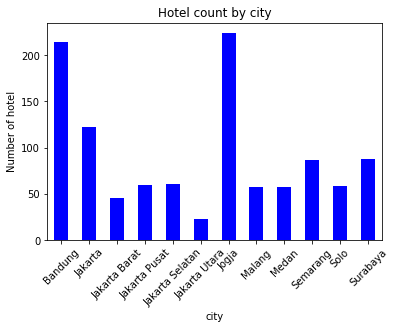

In [22]:
city = hotel_df.groupby("hotel_city").count()
city = city.reset_index()
city = city[["hotel_city","hotel_name"]]
city.rename(columns={"hotel_city":"city","hotel_name":"hotel count"},inplace = True)

city_bar = city.plot.bar(x="city", y="hotel count", rot = 90, legend = None, color = "blue", zorder = 3)
plt.xticks(rotation=45)
plt.title("Hotel count by city")
plt.ylabel("Number of hotel")

Create pie chart for hotel count by city

Text(0.5,1,'Hotel count percentage by city')

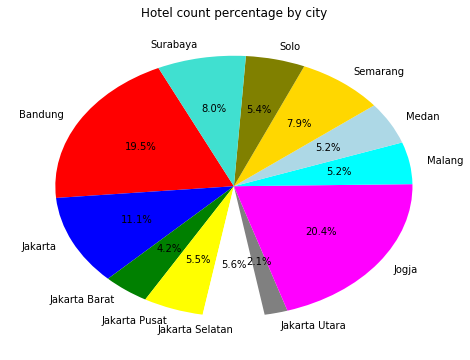

In [23]:
hotel_count = city["hotel count"]
colors = ["red","blue","green","yellow","white","grey","magenta","aqua", "lightblue", "gold", "olive", "turquoise"]
city_labels = city["city"]
plt.figure(figsize=(8,6))
plt.pie(hotel_count, labels=city_labels, colors=colors, startangle=115, autopct="%1.1f%%")
plt.title("Hotel count percentage by city")

Most of the hotel are located in Jakarta, Jogja, and Bandung.

Next, get count hotel for each province

Text(0,0.5,'Number of hotel')

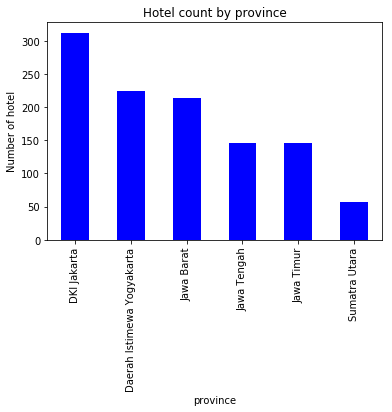

In [24]:
province = hotel_df.groupby("hotel_province").count()
province = province.reset_index()
province = province[["hotel_province","hotel_name"]]
province.rename(columns={"hotel_province":"province","hotel_name":"hotel count"},inplace = True)

province_bar = province.plot.bar(x="province", y="hotel count", rot = 90, legend = None, color = "blue", zorder = 5)
plt.xticks(rotation=90)
plt.title("Hotel count by province")
plt.ylabel("Number of hotel")

Create pie chart for hotel count by city

Text(0.5,1,'Hotel count percentage by province')

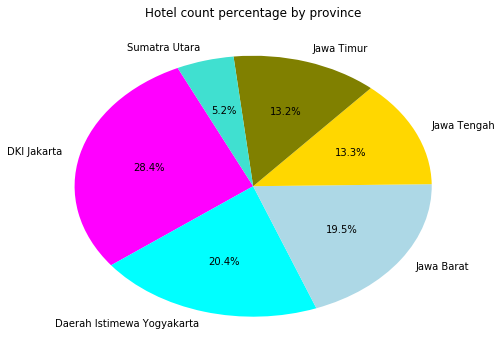

In [25]:
hotel_prov_count = province["hotel count"]
colors = ["magenta","aqua", "lightblue", "gold", "olive", "turquoise"]
province_labels = province["province"]
plt.figure(figsize=(8,6))
plt.pie(hotel_prov_count, labels=province_labels, colors=colors, startangle=115, autopct="%1.1f%%")
plt.title("Hotel count percentage by province")

Most of the hotel are located in DKI Jakarta. 

Text(0,0.5,'price per night (rupiah)')

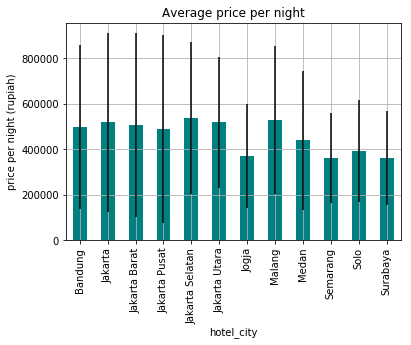

In [26]:
# Obtain the mean and standard deviation (STD)
price_mean = hotel_df.groupby(["hotel_city"]).mean()["price_per_night"]
price_std = hotel_df.groupby(["hotel_city"]).std()["price_per_night"]
# Create new dataframe for mean values
mean_df = pd.DataFrame({"hotel_city":price_mean.index, "price_per_night":price_mean.values})
mean_df = mean_df.set_index("hotel_city")
# Create bar chart with y error bar 
mean_df.plot(kind="bar", yerr=price_std.values, color="teal", legend=None)
plt.xticks(rotation=90)
plt.grid()
plt.title("Average price per night")
plt.ylabel("price per night (rupiah)")

Text(0,0.5,'price per night (rupiah)')

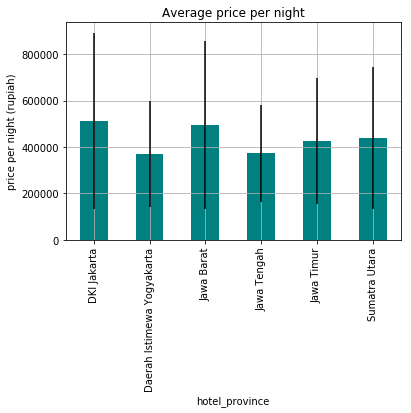

In [27]:
# Obtain the mean and standard deviation (STD)
price_prov_mean = hotel_df.groupby(["hotel_province"]).mean()["price_per_night"]
price_prov_std = hotel_df.groupby(["hotel_province"]).std()["price_per_night"]
# Create new dataframe for mean values
mean_prov_df = pd.DataFrame({"hotel_province":price_prov_mean.index, "price_per_night":price_prov_mean.values})
mean_prov_df = mean_prov_df.set_index("hotel_province")
# Create bar chart with y error bar 
mean_prov_df.plot(kind="bar", yerr=price_prov_std.values, color="teal", legend=None)
plt.xticks(rotation=90)
plt.grid()
plt.title("Average price per night")
plt.ylabel("price per night (rupiah)")

The average price per night in hotel across all the listed Indonesia province would be around Rp 400.000,00 with DKI Jakarta having the greatest spread in price distribution.